# Sklearn NLP - Bag of Words - Remove Stop Words


- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [sklearn, bag_of_words, sentiment, nlp, stopwords,classification, python]

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [115]:
df = pd.read_csv('DATA/Amazon_Fine_Food_Reviews.csv')

In [116]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Text(0, 0.5, 'Count')

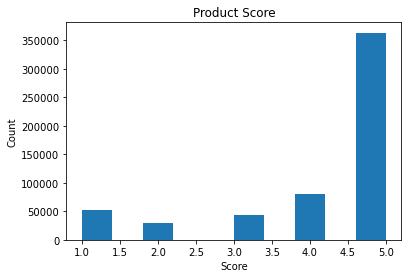

In [117]:
plt.hist(df.Score);
plt.title('Product Score')
plt.xlabel('Score')
plt.ylabel('Count')

## Create sentiment Feature

In [118]:
# Remove Score = 3
df = df[df['Score'] != 3]


# Positive = Score > 3, Negative = Score < 3
df['sentiment'] = df['Score'].apply(lambda rating: +1 if rating >3 else -1)

In [119]:
df[['Score', 'sentiment']].head()

,Score,sentiment
0,5,1
1,1,-1
2,4,1
3,2,-1
4,5,1


## Data Cleaning

In [120]:
def remove_punctuation(text):
    cleaned = "".join(char for char in text if char not in ('?', '.',',', 
                                                 ';','...', ':','-','!','"',"'"))
    return cleaned

In [121]:
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(lambda x: x.lower() )
df['Summary'] = df['Summary'].apply(remove_punctuation)
df['Summary'].head(49)

0                                 good quality dog food
1                                     not as advertised
2                                   delight says it all
3                                        cough medicine
4                                           great taffy
5                                            nice taffy
6           great  just as good as the expensive brands
7                                 wonderful tasty taffy
8                                            yay barley
9                                      healthy dog food
10                      the best hot sauce in the world
11    my cats love this diet food better than their ...
12                 my cats are not fans of the new food
13                                     fresh and greasy
14                          strawberry twizzlers  yummy
15               lots of twizzlers just what you expect
16                                           poor taste
17                                              

## Remove Stop words

In [122]:
import nltk
nltk.download('stopwords')
stopwords =nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samtreacy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [124]:
def remove_stopwords(text):
    cleaned = " ".join(char for char in text.split(' ') if not char in stopwords)
    return cleaned

In [125]:
df['Summary']= df['Summary'].apply(remove_stopwords)
df['Summary'].head(20)

0                       good quality dog food
1                                  advertised
2                                delight says
3                              cough medicine
4                                 great taffy
5                                  nice taffy
6                great  good expensive brands
7                       wonderful tasty taffy
8                                  yay barley
9                            healthy dog food
10                       best hot sauce world
11    cats love diet food better regular food
12                         cats fans new food
13                               fresh greasy
14                strawberry twizzlers  yummy
15                      lots twizzlers expect
16                                 poor taste
17                                       love
18                          great sweet candy
19                    home delivered twizlers
Name: Summary, dtype: object

## Define Target and Features

In [126]:
y = df['sentiment']

In [127]:
X = df['Summary']

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420631,), (105158,), (420631,), (105158,))

## Create bag of words

In [129]:
# Count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

X_train = vectorizer.fit_transform(X_train)
X_test  = vectorizer.transform(X_test)

In [130]:
X_train.shape

(420631, 35429)

## Build Model

In [131]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators=100, verbose=2)

model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 57.1min finished


RandomForestClassifier(verbose=2)

In [132]:
predictions = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [134]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.76      0.78      0.77     16233
           1       0.96      0.95      0.96     88925

    accuracy                           0.93    105158
   macro avg       0.86      0.87      0.86    105158
weighted avg       0.93      0.93      0.93    105158

Confusion Matrix
[[12726  3507]
 [ 4093 84832]]
